#### 1. Logarithmic Scale

Each of the axes' scales are set seperately using set_xscale and set_yscale methods

**Definition**

A logarithmic scale is a nonlinear scale that's used when there is a large value range in your dataset. Instead of a standard linear scale, the values are based on order of magnitude. Each mark on an axis represents a value that is a multiple of the previous mark on the axis.

<br>

**Logarithmic scale vs Linear scale**

Logarithmic price scales are particularly more accurate than linear scales when it comes to long-term price changes. Since the price distribution on a linear scale is equal, a move from 10 to 15, representing a 50% price increase, is the same as a price change from 20 to 25.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,6)

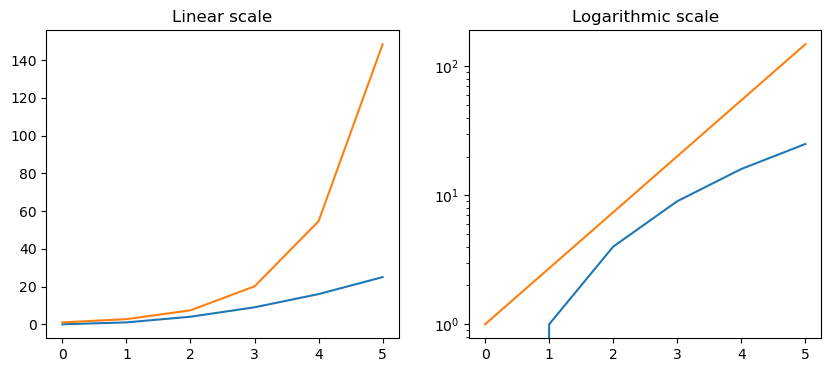

In [21]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title('Linear scale')

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale('log')
axes[1].set_title('Logarithmic scale');

----
----
## 2. Placement of ticks and custom tick labels

We can explicitly determine where we want the axis ticks with set_xticks and set_yticks. 

We can also use the set_xticklabels and set_yticklabels methods to provide a list of custom text labels for each tick location.

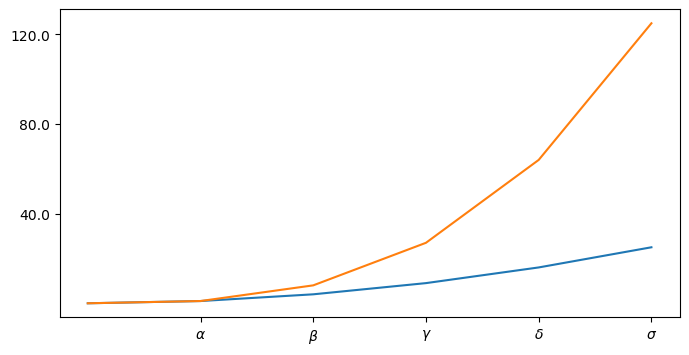

In [55]:
fig,axes = plt.subplots(figsize=(8,4))

axes.plot(x, x**2, x, x**3)

axes.set_xticks([1,2,3,4,5])
# using latex formatting
axes.set_xticklabels([r'$\alpha$',r'$\beta$',r'$\gamma$',r'$\delta$',r'$\sigma$'])

axes.set_yticks([40,80,120])
axes.set_yticklabels(['%.1f' % y for y in [40,80,120]]);   

----
----
## 3. Scientific notation

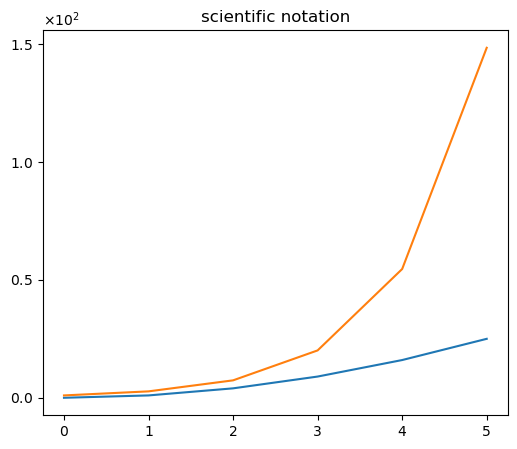

In [14]:
fig,axes = plt.subplots(figsize=(6,5))

axes.plot(x, x**2, x, np.exp(x))
axes.set_title('scientific notation')
axes.set_yticks([0,50,100,150])

from matplotlib import ticker as tc

format_axis = tc.ScalarFormatter(useMathText=True)
format_axis.set_scientific(True)
format_axis.set_powerlimits((0,1))

axes.yaxis.set_major_formatter(format_axis)

plt.show()

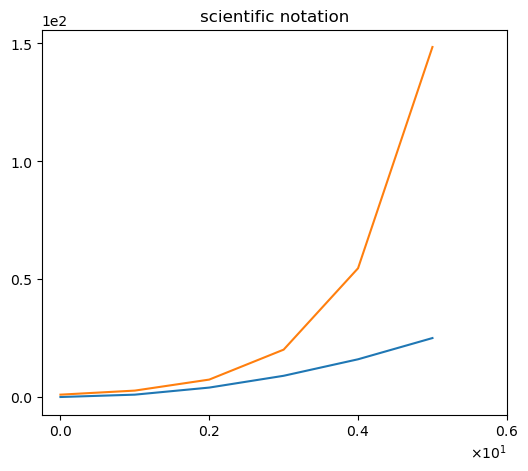

In [34]:
fig,axes = plt.subplots(figsize=(6,5))

axes.plot(x, x**2, x, np.exp(x))
axes.set_title('scientific notation')

axes.set_xticks([0,2,4,6])
axes.set_yticks([0,50,100,150])

from matplotlib import ticker as tc

format_xaxis = tc.ScalarFormatter(useMathText=True) # power as mathematical notation
format_xaxis.set_scientific(True)
format_xaxis.set_powerlimits((1,1))

axes.xaxis.set_major_formatter(format_xaxis)


format_yaxis = tc.ScalarFormatter(useMathText=False) # power as exponential notation
format_yaxis.set_scientific(True)
format_yaxis.set_powerlimits((0,1))

axes.yaxis.set_major_formatter(format_yaxis)


plt.show()

----
----
## 4. Axis number and axis label spacing

In [35]:
import matplotlib as mtp

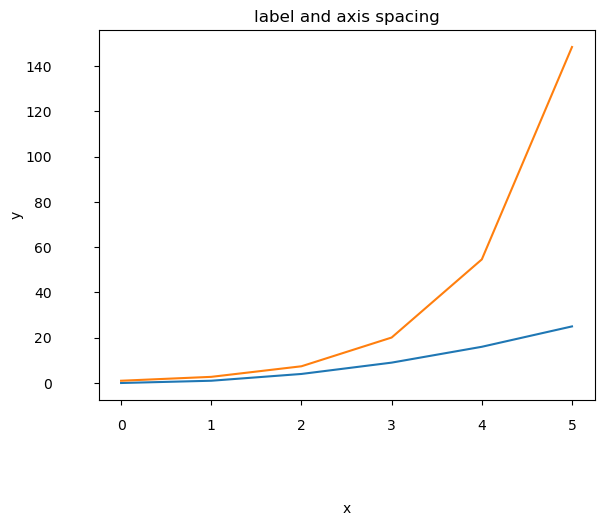

In [44]:
# padding between axis edge and axis numbers
mtp.rcParams['xtick.major.pad'] = 10
mtp.rcParams['ytick.major.pad'] = 30

fig,axes = plt.subplots()

axes.plot(x,x**2,x,np.exp(x))
axes.set_title('label and axis spacing')

# padding between axis numbers and axis label
axes.xaxis.labelpad = 50
axes.yaxis.labelpad = 1

axes.set_xlabel('x')
axes.set_ylabel('y')

plt.show()

In [47]:
# restoring default axis egde and numbers padding

mtp.rcParams['xtick.major.pad'] = 3
mtp.rcParams['ytick.major.pad'] = 3

----
----
## 5. Axis grid

The `grid` method in the axis object can turn on and off grid lines. We can also customize the appearance of the grid lines using the same keyword arguments as the `plot` function.

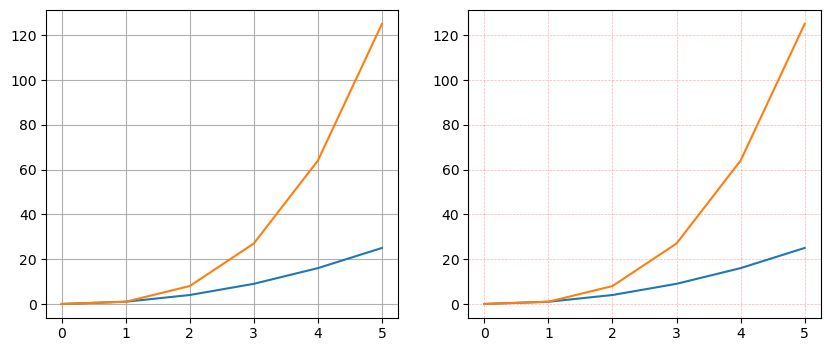

In [58]:
fig,axes = plt.subplots(1,2,figsize=(10,4))

# DEFAULT GRID APPEARANCE
axes[0].plot(x,x**2,x,x**3)
axes[0].grid(True)

# CUSTOMIZED GRID APPEARANCE
axes[1].plot(x,x**2,x,x**3)
axes[1].grid(color='r',alpha=0.3,ls='--',lw=0.5)
# param alpha decides transparency (range: 0 to 1)

plt.show()

----
----
## 6. Axis spine

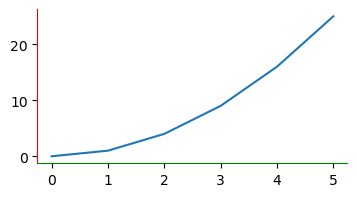

In [28]:
fig,axes = plt.subplots(figsize=(4,2))

axes.plot(x,x**2)

axes.spines['bottom'].set_color('green')

axes.spines['top'].set_visible(False)     # one way to turn off axis
axes.spines['right'].set_color('none')    # another way to turn off axis

axes.spines['left'].set_color('red')

----
----
## 7. Twin axes

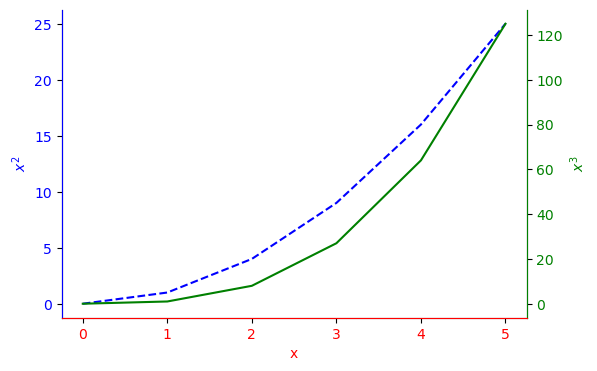

In [80]:
fig,axes1 = plt.subplots(figsize=(6,4))

# FIRST AXIS
# plotting on first axis (left axis)
axes1.plot(x,x**2,ls='--',color='blue')

# setting y axis name wrt left axis
axes1.set_ylabel('$x^2$',color='blue')

# setting left axis label color to blue
for label in axes1.get_yticklabels():
    label.set_color('blue')


# SECOND AXIS
# setting second axis as twin of first
axes2 = axes1.twinx()

# plotting
axes2.plot(x,x**3,color='green')

# setting twin axis labels color as green
for label in axes2.get_yticklabels():
    label.set_color('green')

# setting twin y axis name
axes2.set_ylabel('$x^3$',color='green')


# changing colors of axis spines
axes2.spines['left'].set_color('blue')
axes2.spines['right'].set_color('green')
axes2.spines['bottom'].set_color('red')

# turning off top axis for both plots
for axes in [axes1,axes2]:
    axes.spines['top'].set_visible(False)

# customising x axis
axes1.set_xlabel('x',color='red')
for label in axes1.get_xticklabels():
    label.set_color('red')

plt.show()

----
----
## 8. Axes passing through origin

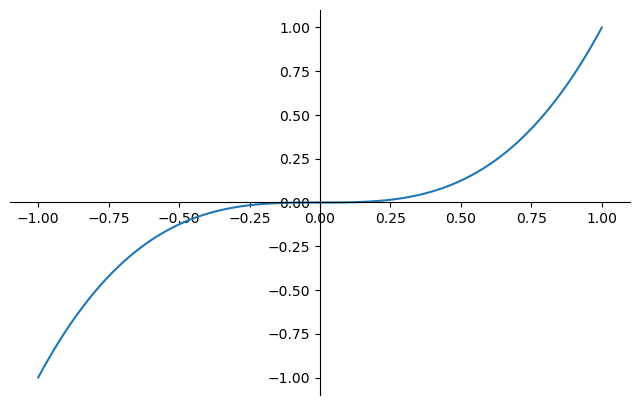

In [94]:
fig,axes = plt.subplots(figsize=(8,5))

# x axis passes through origin
axes.spines['bottom'].set_position(('data',0))

# y axis passes through origin
axes.spines['left'].set_position(('data',0))


# turning off right and top axis spines
for pos in ['right','top']:
    axes.spines[pos].set_visible(False)

# plotting
xx = np.linspace(-1,1,100)
axes.plot(xx,xx**3)

plt.show()

----
----
## 9. Text annotation

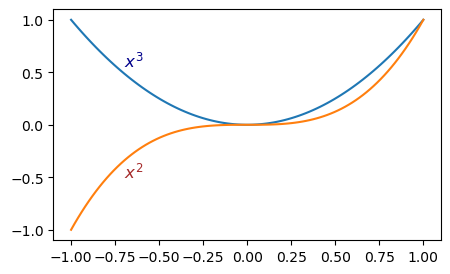

In [111]:
fig,axes = plt.subplots(figsize=(5,3))

axes.plot(xx,xx**2,xx,xx**3)

axes.text(-0.7,-0.5,'$x^2$',color='brown',fontsize=12)
axes.text(-0.7,0.55,'$x^3$',color='darkblue',fontsize=12)

plt.show()